In [2]:

%pip install opencv-contrib-python
%pip install imutils
%pip install scikit-image
%pip install pytesseract
!pip install easyocr



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.8 MB/s eta 0:00:00


In [3]:
import cv2
import pytesseract

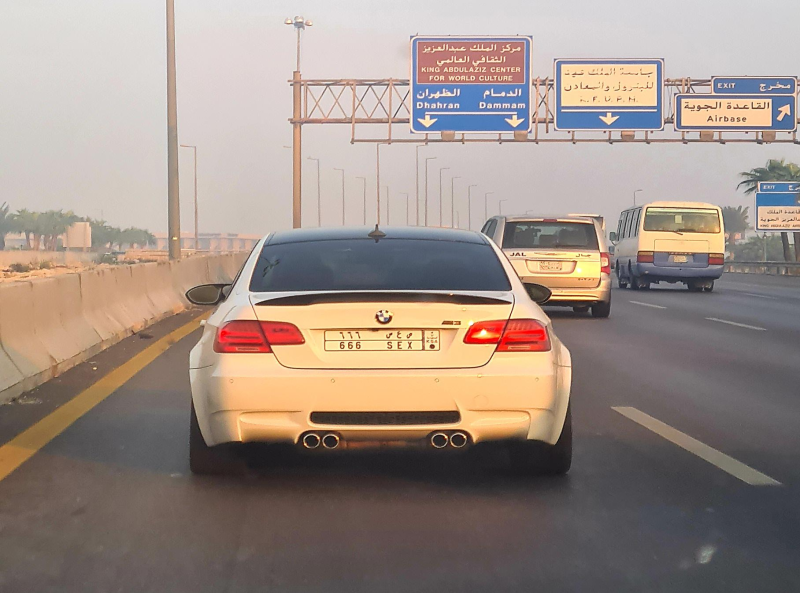

-1

In [4]:
image = cv2.imread('/content/car16.png')
image=cv2.resize(image, (800, 593), interpolation = cv2.INTER_AREA)
from google.colab. patches import cv2_imshow
cv2_imshow( image)
cv2.waitKey(0)

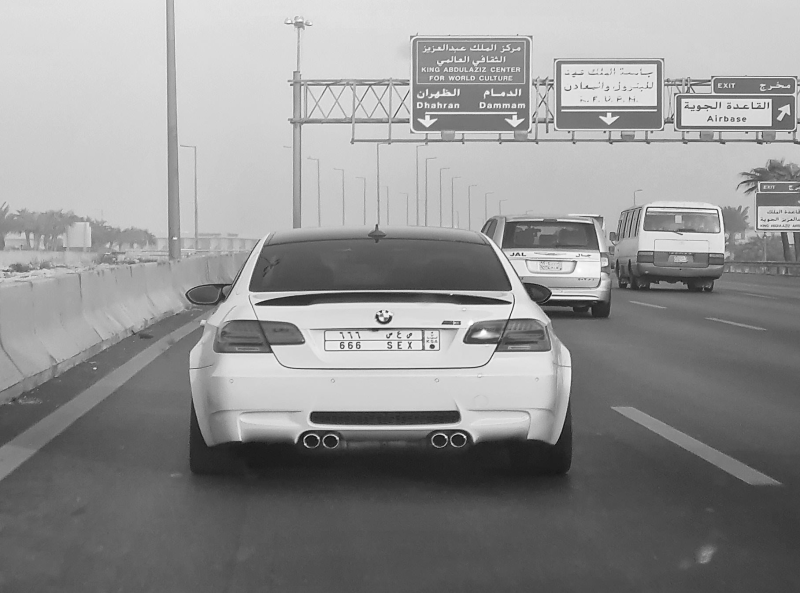

-1

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( gray_image)
cv2.waitKey(0)

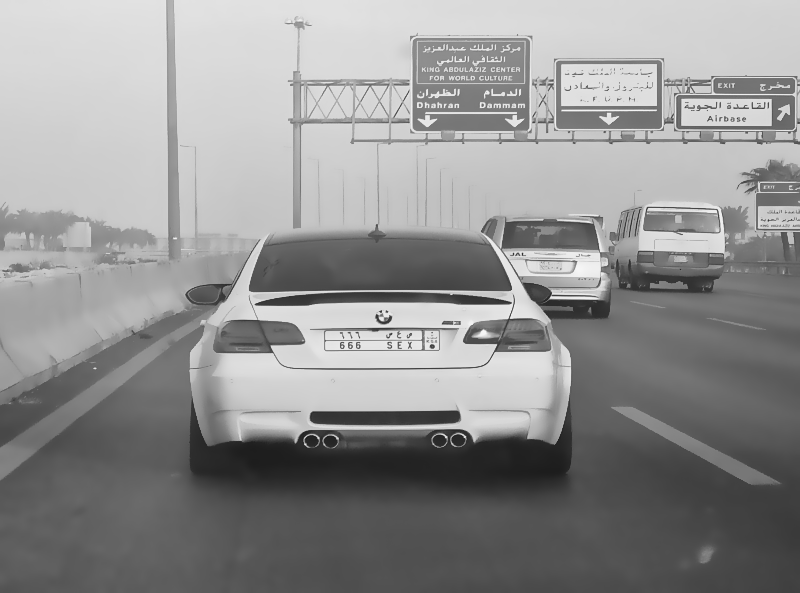

-1

In [6]:
gray_image = cv2.bilateralFilter(gray_image,10,15,15)
#gray_image = cv2.GaussianBlur(gray_image, (7,7),0)
#gray_image = cv2.medianBlur(gray_image,9)
cv2_imshow( gray_image)
cv2.waitKey(0)

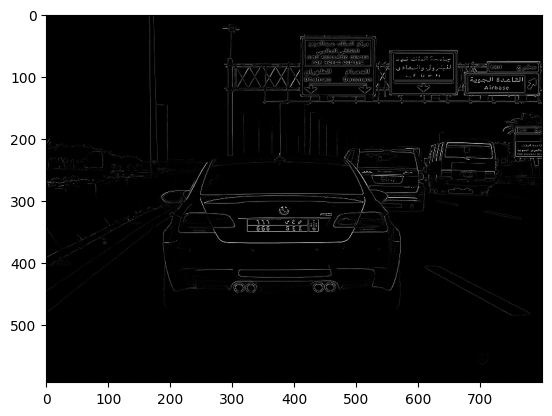

In [7]:
from matplotlib import pyplot as plt
laplacian = cv2.Laplacian(gray_image,cv2.CV_8UC1) 
plt.imshow(laplacian,cmap = 'gray')
plt.savefig('imm.png')
lap = cv2.imread('/content/imm.png')

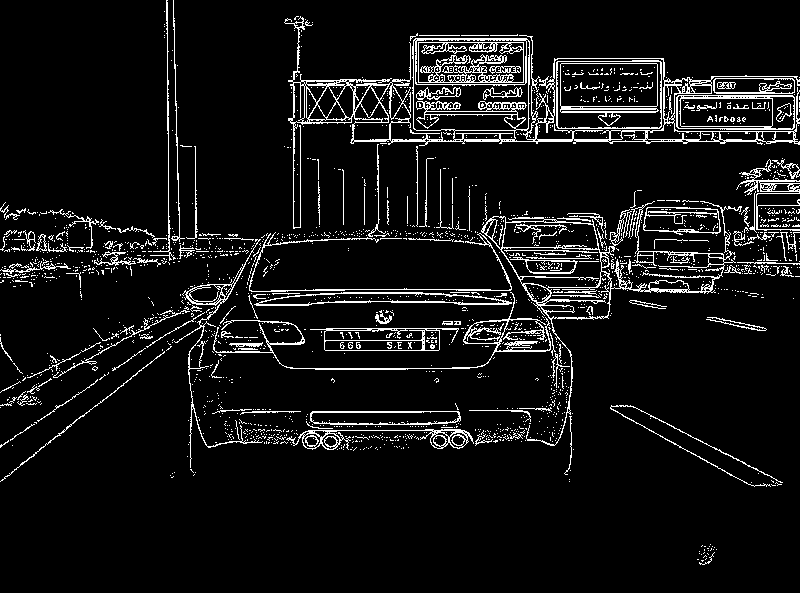

In [8]:
_,thresh=cv2.threshold(laplacian,5,255,0)
cv2_imshow(thresh)

In [9]:
cnts,hir = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Return list with 5 biggest contour area
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:17]


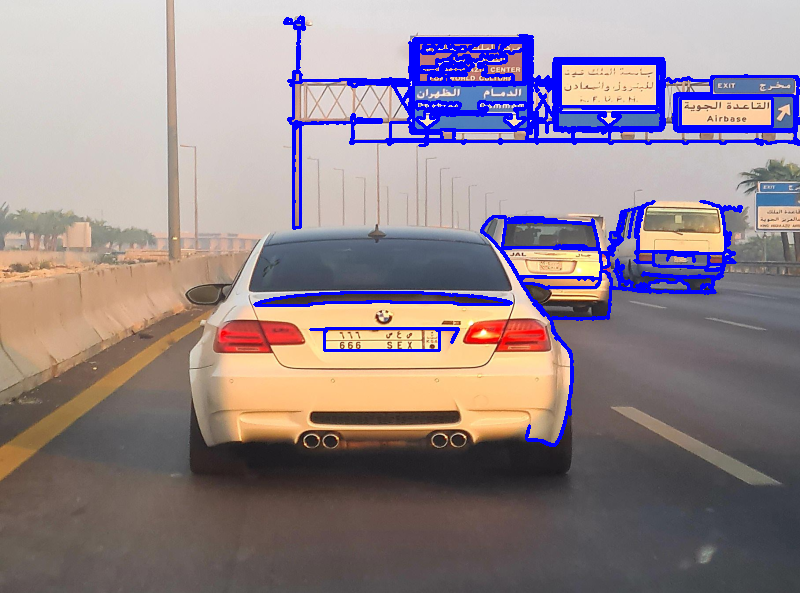

-1

In [10]:
# Drawing the selected contour on the original image
image1=image.copy()
cv2.drawContours(image1, cnts, -1, (255,0,0), 2)
cv2_imshow(image1)
cv2.waitKey(0) #Wait for user input before closing the images displayed


In [11]:
# Find bounding box and extract ROI

import easyocr
OCR=[]
R=[]
for i in range(0,len(cnts)):

                x,y,w,h= cv2.boundingRect(cnts[i])
                cropped_img=image[y:y+h, x:x+w]
              
                reader = easyocr.Reader(['en'])
                result = reader.readtext(cropped_img)
                print(result)
                if result==[]:
                  continue
                OCR.append(result)
                R.append(cropped_img)
                




Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[139, 27], [239, 27], [239, 39], [139, 39]], '#Jia* @Ji $;', 0.033003167419639746), ([[152, 40], [186, 40], [186, 48], [152, 48]], 'AULI', 0.017030352726578712), ([[157, 39], [225, 39], [225, 59], [157, 59]], 'Ajouikiz CE', 0.062040942031356267), ([[206, 50], [236, 50], [236, 56], [206, 56]], 'Cente', 0.025859281404928405), ([[304, 52], [332, 52], [332, 60], [304, 60]], 'L', 0.7386687188093823), ([[164, 58], [224, 58], [224, 66], [164, 66]], 'Woalo Cultua', 0.35982728292158683), ([[280, 66], [320, 66], [320, 74], [280, 74]], 'CiLL |', 0.05885475120438956), ([[131, 71], [179, 71], [179, 85], [131, 85]], 'BJi', 0.13112627233744553), ([[197, 71], [241, 71], [241, 85], [197, 85]], 'PL,ji', 0.06597189033776286), ([[132, 86], [176, 86], [176, 94], [132, 94]], 'Datan', 0.07171143952321564), ([[194, 86], [242, 86], [242, 94], [194, 94]], 'dommom', 0.41069228836037436), ([[399, 85], [467, 85], [467, 99], [399, 99]], 'L4JIa1E', 0.03667323731288151), ([[422, 98], [444, 98], [444, 106], [422, 1

[]


[([[28, 24], [56, 24], [56, 32], [28, 32]], 'CiL', 0.02788237320022605)]


[([[32, 8], [60, 8], [60, 16], [32, 16]], 'L', 0.7386687188093823), ([[8, 22], [36, 22], [36, 30], [8, 30]], 'CiL', 0.02788237320022605)]


[]


[([[6, 1], [107, 1], [107, 15], [6, 15]], '#xiaz@Ji $7', 0.0034070534813368286), ([[18, 13], [93, 13], [93, 27], [18, 27]], 'JWiUlvi', 0.24742704306236488), ([[5, 23], [107, 23], [107, 36], [5, 36]], 'Kino AddulAZIZ center', 0.04967028419834494), ([[18, 36], [50, 36], [50, 42], [18, 42]], 'KaDm', 0.0027515687979757786), ([[64, 36], [98, 36], [98, 42], [64, 42]], 'cutttnr', 0.0759855230624836)]


[([[52, 20], [74, 20], [74, 28], [52, 28]], 'J;', 0.012403792361719368), ([[4.1425070742874555, 18.485504244572475], [31.901523057468275, 15.567268932415228], [32.85749292571254, 25.514495755427525], [5.098476942531726, 28.432731067584772]], 'Jil', 0.15012879398874182)]


[([[10, 6], [54, 6], [54, 14], [10, 14]], 'JrJuls', 0.0044575789886711105), ([[55, 3], [111, 3], [111, 17], [55, 17]], 'OLJI 6A', 0.050029599806041436), ([[20, 13], [57, 13], [57, 27], [20, 27]], 'JlJi', 0.37835296988487244), ([[8, 26], [108, 26], [108, 34], [8, 34]], 'Kino AdoulaziZ Cemter', 0.053719753496025896), ([[66, 36], [100, 36], [100, 42], [66, 42]], 'cutttnr', 0.0759855230624836), ([[69, 49], [111, 49], [111, 61], [69, 61]], 'PL,Ji', 0.12855024671387444), ([[2, 62], [46, 62], [46, 70], [2, 70]], 'Ohohran', 0.06705538293386576), ([[66, 62], [112, 62], [112, 70], [66, 70]], 'pdlmmmdn', 0.14746946378645495), ([[56.14250707428746, 16.485504244572475], [93.93742527200976, 12.651813470396373], [94.85749292571255, 23.514495755427525], [57.06257472799023, 26.348186529603627]], 'Lolvi', 0.024931229901911146), ([[2.1055728090000843, 49.55278640450004], [47.95087143148672, 45.69041395253921], [48.89442719099991, 55.44721359549996], [3.04912856851328, 60.30958604746079]], 'OISJi', 0.0628

[([[2, 0], [49, 0], [49, 13], [2, 13]], 'BJias', 0.034535386347612676), ([[51, 1], [105, 1], [105, 13], [51, 13]], 'OLJI,A', 0.12194038938327062), ([[18, 14], [52, 14], [52, 22], [18, 22]], 'AULI', 0.017030352726578712), ([[72, 24], [102, 24], [102, 30], [72, 30]], 'Cente', 0.025859281404928405), ([[30, 32], [52, 32], [52, 40], [30, 40]], 'Woale', 0.17152247856847735), ([[60, 32], [94, 32], [94, 40], [60, 40]], 'GultuaI', 0.2773457866932496), ([[20.513411707505668, 17.662070536755103], [90.82646249854375, 8.185116731418946], [93.48658829249433, 29.337929463244897], [22.173537501456256, 38.814883268581056]], '~mcln', 0.03678831064419101)]


[([[2.142507074287456, 18.485504244572475], [31.913811548620256, 15.593861533946553], [32.85749292571254, 25.514495755427525], [3.086188451379743, 28.40613846605345]], 'O,u', 0.2832298649860046)]


[([[7, 5], [75, 5], [75, 17], [7, 17]], 'YXJlaLE', 0.05082136424084199), ([[30, 20], [70, 20], [70, 28], [30, 28]], 'Aich oae', 0.07251362778443818)]


[]


[([[3, 3], [43, 3], [43, 15], [3, 15]], 'LXJI', 0.10336961597204208), ([[26, 16], [66, 16], [66, 24], [26, 24]], 'Alch mae', 0.0579163631967289)]


[([[30, 4], [52, 4], [52, 10], [30, 10]], 'T', 0.005149118899711036), ([[27, 13], [55, 13], [55, 23], [27, 23]], '66 6', 0.5621356964111328), ([[72, 0], [134, 0], [134, 23], [72, 23]], '3319', 0.06292367726564407)]


[]


[([[2, 0], [49, 0], [49, 13], [2, 13]], 'BJias', 0.034535386347612676), ([[51, 1], [105, 1], [105, 13], [51, 13]], 'OLJI,A', 0.12194038938327062), ([[18, 14], [52, 14], [52, 22], [18, 22]], 'AULI', 0.017030352726578712), ([[72, 24], [102, 24], [102, 30], [72, 30]], 'Cente', 0.025859281404928405), ([[30, 32], [52, 32], [52, 40], [30, 40]], 'Woale', 0.17152247856847735), ([[60, 32], [94, 32], [94, 40], [60, 40]], 'GultuaI', 0.2773457866932496), ([[20.513411707505668, 17.662070536755103], [90.82646249854375, 8.185116731418946], [93.48658829249433, 29.337929463244897], [22.173537501456256, 38.814883268581056]], '~mcln', 0.03678831064419101)]
[]


In [12]:
R

[array([[[218, 219, 223],
         [219, 221, 224],
         [221, 222, 226],
         ...,
         [210, 210, 210],
         [210, 210, 210],
         [210, 210, 210]],
 
        [[216, 222, 225],
         [216, 223, 226],
         [214, 220, 223],
         ...,
         [210, 210, 210],
         [210, 210, 210],
         [210, 210, 210]],
 
        [[221, 224, 228],
         [218, 217, 229],
         [202, 201, 220],
         ...,
         [210, 210, 210],
         [210, 210, 210],
         [210, 210, 210]],
 
        ...,
 
        [[186, 194, 207],
         [185, 193, 207],
         [185, 193, 206],
         ...,
         [118, 152, 193],
         [114, 148, 190],
         [104, 137, 181]],
 
        [[184, 192, 206],
         [184, 192, 206],
         [185, 193, 207],
         ...,
         [172, 206, 240],
         [167, 201, 237],
         [162, 195, 233]],
 
        [[183, 193, 203],
         [182, 192, 202],
         [184, 194, 205],
         ...,
         [183, 202, 225],
  

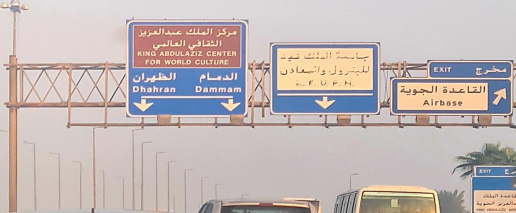

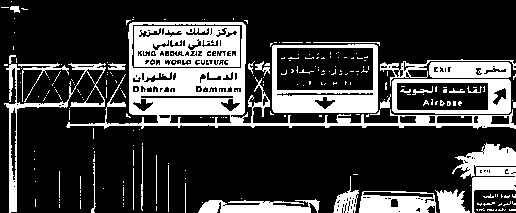

In [13]:
forOCR=[]
for i in R:
  cv2_imshow(i)

  gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  

  cv2_imshow(thresh)

  forOCR.append(thresh[ thresh.shape[0]//2-5 : thresh.shape[0],:])
  break #to print the first image only

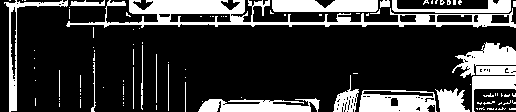

cannot crop well


In [14]:
NUM=[]
CH=[]
OCR=[]
try:
  for i in forOCR:
    cv2_imshow(i)
    
    x=i[:,0:i.shape[1]//2]
    NUM.append(x)
    reader = easyocr.Reader(['en'])
    result = reader.readtext(x)
    #print(result)
    OCR.append(result[-1][-2])
     
    y=i[:,i.shape[1]//2:]
    CH.append(y)
    result = reader.readtext(y)
    #print(result)
    OCR.append(result[-1][-2])

except:
  print("cannot crop well")
  
  #NUM.append()

In [15]:
OCR

[]

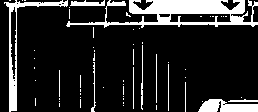

In [16]:
for i in NUM:
  cv2_imshow(i)

for i in CH:
  cv2_imshow(i)